## **Import libraries**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## **Load RFM data**

In [143]:
df = pd.read_csv('rfm_data.csv')

print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.describe())


(5860, 4)
Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')
CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64
         CustomerID      Recency    Frequency       Monetary
count   5860.000000  5860.000000  5860.000000    5860.000000
mean   15316.832423   200.461263     6.221331    2956.473049
std     1714.531194   207.496838    12.857032   14352.382489
min    12346.000000     0.000000     1.000000       2.900000
25%    13836.750000    25.000000     1.000000     344.492500
50%    15315.500000   101.000000     3.000000     883.595000
75%    16799.250000   376.000000     7.000000    2284.647500
max    18287.000000   733.000000   391.000000  597336.110000


## **Scale RFM features**

In [144]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])


## **Determine optimal clusters (Elbow + Silhouette)**

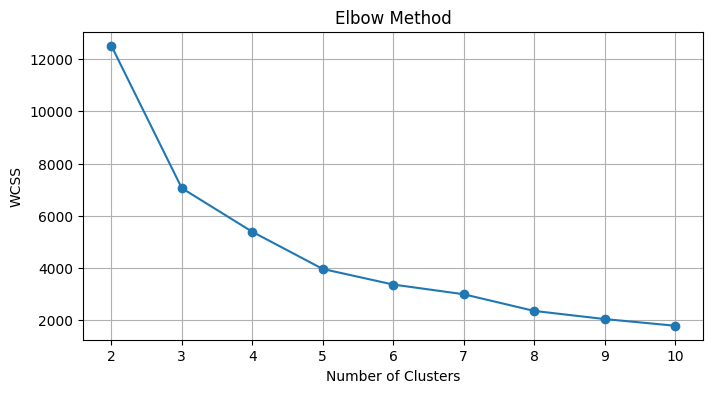

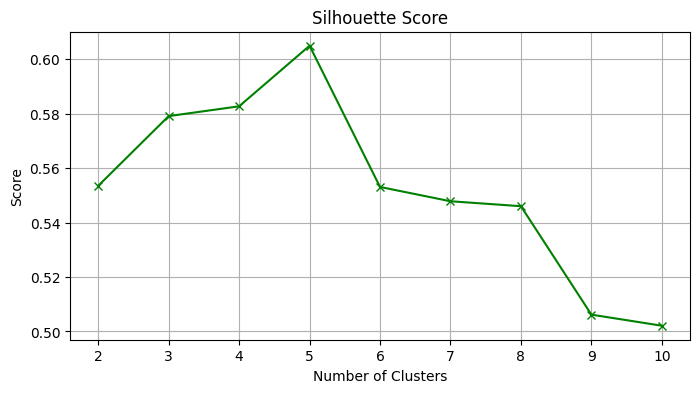

In [145]:
wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='x', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()


## **Apply K-Means**

In [146]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(rfm_scaled)


## **Cluster Profile Summary**

In [147]:
summary = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).rename(columns={'CustomerID': 'CustomerCount'}).round(2)

print("\n Cluster Summary:")
print(summary)



 Cluster Summary:
         CustomerCount  Recency  Frequency   Monetary
Cluster                                              
0                 1928   465.65       2.17     744.02
1                 3614    74.06       5.39    2042.17
2                   17    28.18     159.29  135622.88
3                    2     8.50     145.00  557105.30
4                  299    29.36      32.78   17024.30


## **Assign business segment labels to clusters**

In [148]:
segment_map = {
    0: 'At-Risk Customers',
    1: 'Potential Loyalists',
    2: 'One-Time Buyers',
    3: 'VIP Customers',
    4: 'Average Buyers'
}

df['Segment'] = df['Cluster'].map(segment_map)


## **Visualize RFM distributions by cluster**

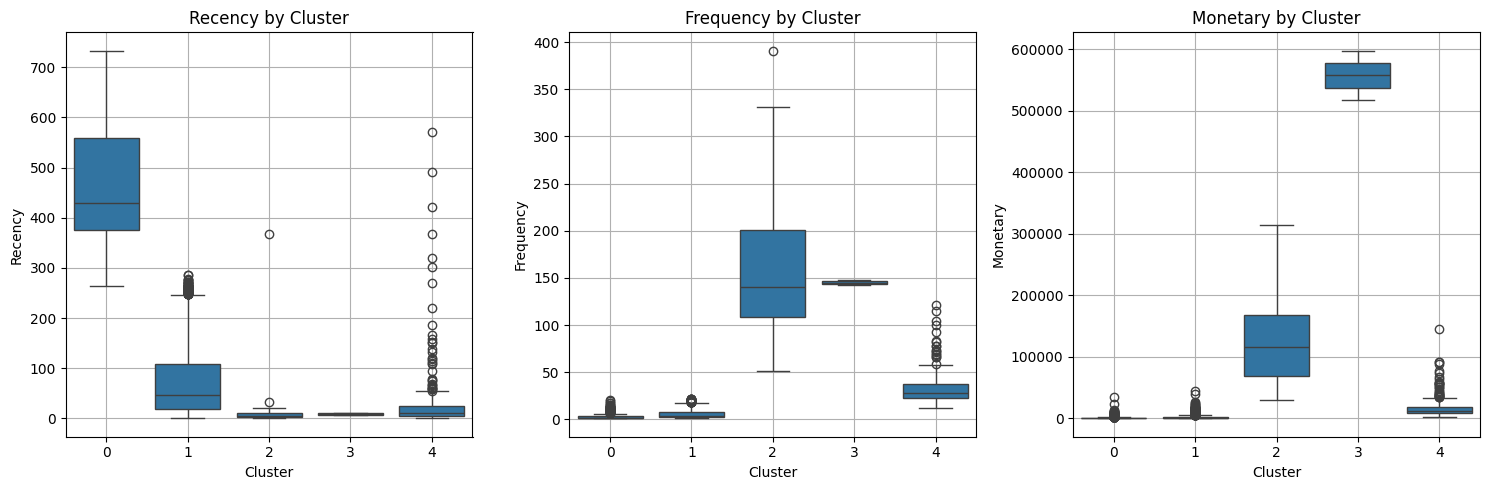

In [149]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'{col} by Cluster')
    plt.grid(True)
plt.tight_layout()
plt.show()


## **Customer count per segment**

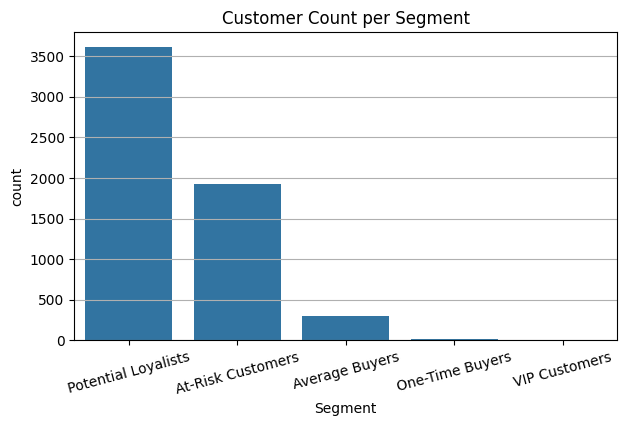

In [150]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.title('Customer Count per Segment')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


## **Cluster Heatmap Summary**

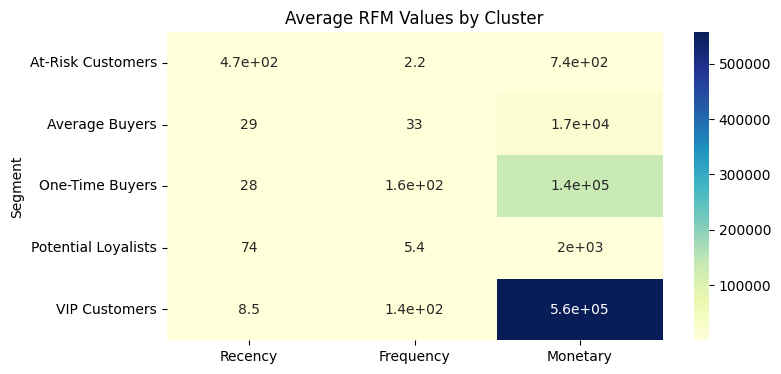

In [151]:
summary = df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
plt.figure(figsize=(8, 4))
sns.heatmap(summary, annot=True, cmap='YlGnBu')
plt.title("Average RFM Values by Cluster")
plt.show()


## **Save clustered and Labeled RFM data**

In [152]:
df.to_csv('rfm_labeled.csv', index=False)
print("Exported: rfm_labeled.csv with Segment Names")


Exported: rfm_labeled.csv with Segment Names
